In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
sd=pd.read_csv("/content/Salary_dataset.csv")

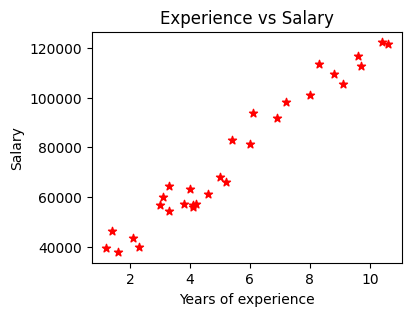

In [4]:
plt.figure(figsize=(4,3))
plt.scatter(sd['YearsExperience'],sd['Salary'],color='r',marker='*')
plt.title('Experience vs Salary')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [5]:
x=sd['YearsExperience']
y=sd['Salary']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=79)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
LR=LinearRegression()
LR

LinearRegression()

In [10]:
LR.fit(xtrain.values.reshape(-1,1),ytrain)

LinearRegression()

In [15]:
ypred=LR.predict(xtest.values.reshape(-1,1))
ypred

array([[101018.77208348],
       [ 55885.40241488],
       [ 53004.54903178],
       [ 68369.10040832],
       [125986.16807036],
       [ 35719.42873317]])

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse=mean_squared_error(ytest,ypred)
mse

16352027.508075342

In [18]:
rmse=np.sqrt(mse)
rmse

np.float64(4043.764027249283)

In [19]:
pip install gradio

In [20]:
pip install gtts


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


In [21]:
from gtts import gTTS

In [22]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

# ✅ Step 1: Load dataset or create dummy one
file_path = "Salary_dataset.csv"

if os.path.exists(file_path):
    sd = pd.read_csv(file_path)
    if "Unnamed: 0" in sd.columns:
        sd = sd.drop("Unnamed: 0", axis=1)
else:
    # Create a dummy dataset if file not found
    data = {
        "YearsExperience": [1,2,3,4,5,6,7,8,9,10],
        "Salary": [25000,30000,35000,40000,45000,50000,60000,70000,80000,90000]
    }
    sd = pd.DataFrame(data)

# ✅ Step 2: Prepare features and target
X = sd["YearsExperience"].values.reshape(-1, 1)
y = sd["Salary"].values.reshape(-1, 1)

# ✅ Step 3: Train/test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Step 4: Train model
LR = LinearRegression()
LR.fit(xtrain, ytrain)

# ✅ Step 5: Prediction + Regression Plot
def predict_salary_and_plot(years_exp):
    try:
        years_exp = float(years_exp)
        pred = LR.predict(np.array([[years_exp]]))[0][0]
        result = f"Predicted salary for {years_exp} years of experience is ₹{pred:,.2f}"

        # Create regression plot
        plt.figure(figsize=(8,6))
        plt.scatter(xtrain, ytrain, color="red", label="Training Data")
        plt.scatter(xtest, ytest, color="green", label="Testing Data")
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
        plt.plot(x_range, LR.predict(x_range), color="blue", label="Regression Line")
        plt.scatter(years_exp, pred, color="purple", s=200, marker="X",
                    label=f"Predicted Salary ({years_exp} yrs)")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.title("Regression Plot: Experience vs Salary")
        plt.legend()
        plt.grid(True)

        plot_file = "regression_plot.png"
        plt.savefig(plot_file)
        plt.close()

        return result, plot_file
    except Exception as e:
        return f"Error: {str(e)}", None

# ✅ Step 6: Gradio interface
iface = gr.Interface(
    fn=predict_salary_and_plot,
    inputs=gr.Textbox(label="Years of Experience"),
    outputs=[
        gr.Textbox(label="Predicted Salary"),
        gr.Image(label="Regression Plot")
    ],
    title="Salary Prediction Model with Regression Plot",
    description="Enter years of experience to get a predicted salary and see it on the regression plot."
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://14c1d2d67787205245.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
